In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
library(nycflights13)

Warning message:
"package 'nycflights13' was built under R version 3.6.3"

In [3]:
tail(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,9,30,NA,1842,NA,NA,2019,NA,EV,5274,N740EV,LGA,BNA,NA,764,18,42,2013-09-30 18:00:00
2013,9,30,NA,1455,NA,NA,1634,NA,9E,3393,NA,JFK,DCA,NA,213,14,55,2013-09-30 14:00:00
2013,9,30,NA,2200,NA,NA,2312,NA,9E,3525,NA,LGA,SYR,NA,198,22,0,2013-09-30 22:00:00
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


Data frame with columns :-
* year, month, day <- Date of departure.
* dep_time, arr_time <- Actual departure and arrival times (format HHMM or HMM), local tz.
* sched_dep_time, sched_arr_time <- Scheduled departure and arrival times (format HHMM or HMM), local tz.
* dep_delay, arr_delay <- Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
* carrier <- Two letter carrier abbreviation. See airlines to get name.
* flight <- Flight number.
* tailnum <- Plane tail number. See planes for additional metadata.
* origin, dest <- Origin and destination. See airports for additional metadata.
* air_time <- Amount of time spent in the air, in minutes.
* distance <- Distance between airports, in miles.
* hour, minute <- Time of scheduled departure broken into hour and minutes.
* time_hour <- Scheduled date and hour of the flight as a POSIXct date. Along with origin, can be used to join flights data to weather data.

In [4]:
glimpse(flights)

Observations: 336,776
Variables: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013...
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 55...
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 60...
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2,...
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 8...
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 8...
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7,...
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6"...
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301...
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N...
$ origin        

In [5]:
summary(flights)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

# dplyr Basics

Key dplyr functions :
* filter() <- Picks observations by values.
* arrange() <- Reorder the rows.
* mutate() <- Create new variables with functions of existing variables.
* summarize() <- Collapse many values down to a single summary.
* group_by() <- Used in conjunction with all above given functions. It changes the scope of each function from operating on the entire dataset to operating on it group-by-group.

# Fliter Rows with filter() :-
* 1st argument <- name of dataframe.
* 2nd & subsequent argument <- Expressions that filter the dataframe.

In [6]:
head(filter(flights, month == 1, day == 1))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


To save the result use <- operator. Also, to save data in variable and print out the result simultaneously, wrap the assignment with parentheses.

In [7]:
head(jan1 <- filter(flights, month == 1, day == 1))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Common Problem when using == : floating point numbers. To resolve this issue use near().

In [8]:
sqrt(5) ^ 2 == 5       #floating point number
near(sqrt(5) ^ 2, 5)   # using near() inplace of ==

[1] FALSE

[1] TRUE

Multiple arguments ot filter() are combined with 'and'. 
Boolean operators :
* & is and
* | is or
* ! is not

In [9]:
head(nov_or_dec <- filter(flights, month == 11 | month == 12))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


x %in% y <- Useful shorthand for selecting every row where x is one of the values in y.

In [10]:
head(dec_or_nov <- filter(flights, month %in% c(11,12)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00


Simplify complicated subsetting by De-Morgan's Law <- !(x & y) is same as !x | !y and !(x | y) is same as !x & !y.

In [11]:
head(filter(flights, !(arr_time > 120 | dep_time > 120)))   # without using De-Morgan's Law
head(filter(flights, arr_time < 120 & dep_time < 120))      # with using De-Morgan's Law

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,13,1,2249,72,108,2357,71,B6,22,N206JB,JFK,SYR,41,209,22,49,2013-01-13 22:00:00
2013,1,16,2,2125,157,119,2250,149,MQ,4660,N504MQ,LGA,BNA,121,764,21,25,2013-01-16 21:00:00
2013,1,25,17,2249,88,119,2357,82,B6,22,N228JB,JFK,SYR,45,209,22,49,2013-01-25 22:00:00
2013,1,30,3,2159,124,100,2306,114,EV,4322,N18556,EWR,PWM,42,284,21,59,2013-01-30 21:00:00
2013,10,7,6,2159,127,57,2306,111,EV,3842,N19554,EWR,MHT,32,209,21,59,2013-10-07 21:00:00
2013,10,7,9,2030,219,109,2205,184,WN,382,N415WN,LGA,MDW,105,725,20,30,2013-10-07 20:00:00


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,13,1,2249,72,108,2357,71,B6,22,N206JB,JFK,SYR,41,209,22,49,2013-01-13 22:00:00
2013,1,16,2,2125,157,119,2250,149,MQ,4660,N504MQ,LGA,BNA,121,764,21,25,2013-01-16 21:00:00
2013,1,25,17,2249,88,119,2357,82,B6,22,N228JB,JFK,SYR,45,209,22,49,2013-01-25 22:00:00
2013,1,30,3,2159,124,100,2306,114,EV,4322,N18556,EWR,PWM,42,284,21,59,2013-01-30 21:00:00
2013,10,7,6,2159,127,57,2306,111,EV,3842,N19554,EWR,MHT,32,209,21,59,2013-10-07 21:00:00
2013,10,7,9,2030,219,109,2205,184,WN,382,N415WN,LGA,MDW,105,725,20,30,2013-10-07 20:00:00


Almost every expression involving a missing value ("NA") will also be unknown ("NA"). To determine if a value is missing use, is.na() function. 

In [12]:
NA < 02
NA == NA
x <- NA
is.na(x)

[1] NA

[1] NA

[1] TRUE

filter() only includes rows where the condition is TRUE; it excludes both FALSE and NA values. (To include "NA" values in filter, specify explicitly using is.na().)

In [13]:
df <- tibble(x = c(1, NA, 3))
filter(df, x > 1)                   # filter() without "NA" values.
filter(df, is.na(x) | x > 1)      # filter() with "NA" values included.

x
3


x
NA
3


# Arrange rows with arrange()

arrange() <- Takes a dataframe and a column name (or more complicated expressions) to order by. If more than one column names are provided, then each additional column will be used to break ties in the values of preceding columns.

In [14]:
head(arrange(flights, year, month, day))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Use the desc() to sort a column in decreasing order.

In [15]:
head(arrange(flights, desc(arr_delay)))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


Note <- Missing values ("NA") are always sorted at the end, irrespective of the order (i.e. either ascending or descending).

In [16]:
head(arrange(flights, desc(is.na(dep_time))))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00


Since, is.na(dep_time) can take only two values either, i.e. TRUE or FALSE (where, FALSE < TRUE). Now, desc() function on the top of is.na() will sort the rows so that, rows with dep_time == "NA" come up first.

In [17]:
head(arrange(flights, desc(dep_delay), arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00


Sorting flights on the basis of departure delay (most first) and using arrival delay (least first) as the tie-breaker.

In [18]:
head(arrange(flights, desc(distance/air_time))) # flights travelling at the fastest speed

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,5,25,1709,1700,9,1923,1937,-14,DL,1499,N666DN,LGA,ATL,65,762,17,0,2013-05-25 17:00:00
2013,7,2,1558,1513,45,1745,1719,26,EV,4667,N17196,EWR,MSP,93,1008,15,13,2013-07-02 15:00:00
2013,5,13,2040,2025,15,2225,2226,-1,EV,4292,N14568,EWR,GSP,55,594,20,25,2013-05-13 20:00:00
2013,3,23,1914,1910,4,2045,2043,2,EV,3805,N12567,EWR,BNA,70,748,19,10,2013-03-23 19:00:00
2013,1,12,1559,1600,-1,1849,1917,-28,DL,1902,N956DL,LGA,PBI,105,1035,16,0,2013-01-12 16:00:00
2013,11,17,650,655,-5,1059,1150,-51,DL,315,N3768,JFK,SJU,170,1598,6,55,2013-11-17 06:00:00


In [19]:
head(arrange(flights, desc(distance))) # longest distance flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013,1,6,1019,900,79,1558,1530,28,HA,51,N385HA,JFK,HNL,611,4983,9,0,2013-01-06 09:00:00


In [20]:
head(arrange(flights, desc(air_time))) # flights with the least air-time

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,3,17,1337,1335,2,1937,1836,61,UA,15,N77066,EWR,HNL,695,4963,13,35,2013-03-17 13:00:00
2013,2,6,853,900,-7,1542,1540,2,HA,51,N389HA,JFK,HNL,691,4983,9,0,2013-02-06 09:00:00
2013,3,15,1001,1000,1,1551,1530,21,HA,51,N388HA,JFK,HNL,686,4983,10,0,2013-03-15 10:00:00
2013,3,17,1006,1000,6,1607,1530,37,HA,51,N380HA,JFK,HNL,686,4983,10,0,2013-03-17 10:00:00
2013,3,16,1001,1000,1,1544,1530,14,HA,51,N384HA,JFK,HNL,683,4983,10,0,2013-03-16 10:00:00
2013,2,5,900,900,0,1555,1540,15,HA,51,N386HA,JFK,HNL,679,4983,9,0,2013-02-05 09:00:00


# Select Columns with select()

select() <- It allows to zoom in on a useful subset of the dataframe using operations based on the names of variables.

In [21]:
head(select(flights, year, month, day), 4)   # selecting multiple columns in the dataframe
head(select(flights, year:day), 4)           # shorthand for selcting all columns between year and day (inclusive) 

year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1


year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [22]:
head(select(flights, -(year:day)))           # shorthand for selecting all columns except those from year to day (inclusive)

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


Helper functions within select :
* starts_with("abc") <- matches names that begin with "abc"
* ends_with("abc") <- matches names that end with "abc"
* contains("abc") <-  matches names that contain "abc"
* matches("(,)//@!") <- selects variables that matches a regular expression "(.)//@!"
* num_range("a",1:4) <- matches a1, a2, a3, a4

rename() <- It's used to rename variables, and it keeps all the variables that aren't explicitly mentioned

In [23]:
head(rename(flights, tail_num = tailnum))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [24]:
head(select(flights, distance, air_time, tailnum, everything()))

distance,air_time,tailnum,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,hour,minute,time_hour
1400,227,N14228,2013,1,1,517,515,2,830,819,11,UA,1545,EWR,IAH,5,15,2013-01-01 05:00:00
1416,227,N24211,2013,1,1,533,529,4,850,830,20,UA,1714,LGA,IAH,5,29,2013-01-01 05:00:00
1089,160,N619AA,2013,1,1,542,540,2,923,850,33,AA,1141,JFK,MIA,5,40,2013-01-01 05:00:00
1576,183,N804JB,2013,1,1,544,545,-1,1004,1022,-18,B6,725,JFK,BQN,5,45,2013-01-01 05:00:00
762,116,N668DN,2013,1,1,554,600,-6,812,837,-25,DL,461,LGA,ATL,6,0,2013-01-01 06:00:00
719,150,N39463,2013,1,1,554,558,-4,740,728,12,UA,1696,EWR,ORD,5,58,2013-01-01 05:00:00


The above technique is used when there are handful of variables and, we need to move a certain variable in the beginning of dataframe.

In [25]:
head(select(flights, starts_with("dep") , starts_with("arr")))

dep_time,dep_delay,arr_time,arr_delay
517,2,830,11
533,4,850,20
542,2,923,33
544,-1,1004,-18
554,-6,812,-25
554,-4,740,12


In [26]:
head(select(flights, distance, distance))      # select() ignores same variable name included multiple times

distance
1400
1416
1089
1576
762
719


In [27]:
vars <- c("year", "month", "day", "dep_delay", "arr_delay")
head(select(flights, one_of(vars)))

year,month,day,dep_delay,arr_delay
2013,1,1,2,11
2013,1,1,4,20
2013,1,1,2,33
2013,1,1,-1,-18
2013,1,1,-6,-25
2013,1,1,-4,12


# Add New Variables with mutate()

mutate() <- It's used to add new columns that are functions of the existing columns. It always adds new columns at the end of dataset.

In [28]:
flights_sml <- select(flights, 
                     year:day, 
                     ends_with('delay'),
                     distance,
                     air_time)
head(mutate(
    flights_sml, 
    gain = arr_delay - dep_delay,
    speed = distance / air_time * 60
))

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
2013,1,1,2,11,1400,227,9,370.0441
2013,1,1,4,20,1416,227,16,374.2731
2013,1,1,2,33,1089,160,31,408.3750
2013,1,1,-1,-18,1576,183,-17,516.7213
2013,1,1,-6,-25,762,116,-19,394.1379
2013,1,1,-4,12,719,150,16,287.6000


Note <- mutate() can refer to the newly created columns.

In [29]:
head(mutate(flights_sml, 
      gain = arr_delay - dep_delay,
      hours = air_time / 60,
      gain_per_hour = gain / hours))

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
2013,1,1,2,11,1400,227,9,3.783333,2.378855
2013,1,1,4,20,1416,227,16,3.783333,4.229075
2013,1,1,2,33,1089,160,31,2.666667,11.625000
2013,1,1,-1,-18,1576,183,-17,3.050000,-5.573770
2013,1,1,-6,-25,762,116,-19,1.933333,-9.827586
2013,1,1,-4,12,719,150,16,2.500000,6.400000


Use transmute() to only keep the new columns in the dataframe.

In [30]:
head(transmute(flights_sml,
          gain = arr_delay - dep_delay,
          hours = air_time / 60,
          gain_per_hour = gain / hours))

gain,hours,gain_per_hour
9,3.783333,2.378855
16,3.783333,4.229075
31,2.666667,11.625000
-17,3.050000,-5.573770
-19,1.933333,-9.827586
16,2.500000,6.400000


Generally used functions with mutate() <- The key property is that the function must be vectorized.

* Arithmetic Operators (+, -, *, /, ^) <- if one parameter is shorter than the other, it will be automatically be extended to be the same length. This is most useful when one argument is a single number. Also useful in conjunction with the aggregate functions.
* Modular arthmetic (%/% and %%) <- %/% (integer division) and %% (remainder), where x == y* (x %/% y) + (x %% y).Helpful to calculate hours and minutes from the time provided. 
* Logarithms (log(), log2(), log10()) <- Useful transformation for dealing with data that ranges across multiple orders of magnitude. It also converts multiplicative relationships to additive. (Recommended to use log2() because it's easy to interpret :  a difference of 1 on the log scale corresponds to doubling on the original scale and a difference of -1 corresponds to halving.)
* Offsets <- lead() and lag() allows to refer to leading and lagging values. It also allows to compute running differences (eg: x - lag(x)) or find value change (eg: x!= lag(x)). Most useful in conjunction with group_by().
* Culumative and Rolling Aggregates <- R Functions for running sums, products, mins, maxes: cumsum(), cumprod(), cummin(), cummax(), respectively. dplyr function for cumulative mean : cummean(). (If rolling aggregates are needed, try RcppRoll package.)
* Logical Operators (<, <=, >, >=, !=)
* Ranking <- Use min_rank() to sort ranks in ascending order(default gives the smallest value the smallest rank). Other variants are row_number(), dense_rank(), percent_rank(), cume_dist() and ntile().

In [31]:
# Modular Arithmetic
head(transmute(flights, dep_time, hours = dep_time %/% 100, minutes = dep_time %% 100))

dep_time,hours,minutes
517,5,17
533,5,33
542,5,42
544,5,44
554,5,54
554,5,54


In [32]:
# Offsets
(x <- 1:10)
lag(x)
lead(x)

[1]  1  2  3  4  5  6  7  8  9 10

[1] NA  1  2  3  4  5  6  7  8  9

[1]  2  3  4  5  6  7  8  9 10 NA

In [33]:
# Cumulative and Rolling Aggregates
cumsum(x)
cumprod(x)
cummin(x)
cummax(x)
cummean(x)

[1]  1  3  6 10 15 21 28 36 45 55

[1]       1       2       6      24     120     720    5040   40320  362880
[10] 3628800

[1] 1 1 1 1 1 1 1 1 1 1

[1]  1  2  3  4  5  6  7  8  9 10

[1] 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5

In [34]:
# Ranking
y <- c(1, 2, 2, NA, 3, 4, 7)

min_rank(y)
row_number(y)
dense_rank(desc(y))
percent_rank(y)
cume_dist(y)
ntile(y, n = 5)

[1]  1  2  2 NA  4  5  6

[1]  1  2  3 NA  4  5  6

[1]  5  4  4 NA  3  2  1

[1] 0.0 0.2 0.2  NA 0.6 0.8 1.0

[1] 0.1666667 0.5000000 0.5000000        NA 0.6666667 0.8333333 1.0000000

[1]  1  1  2 NA  3  4  5

In [35]:
# Departure time (dep_time) & Scheduled Departure Time (sched_dep_time) converted to total number of minutes from midnight

hrs_to_min <- function(x){
    ((x %/% 100) * 60) + x %% 100
}

head(transmute(
    flights, 
    dep_time,
    sched_dep_time,
    dep_time_in_min = hrs_to_min(dep_time), 
    sched_dep_time_in_min = hrs_to_min(sched_dep_time)
))

dep_time,sched_dep_time,dep_time_in_min,sched_dep_time_in_min
517,515,317,315
533,529,333,329
542,540,342,340
544,545,344,345
554,600,354,360
554,558,354,358


In [36]:
# Relation between the dep_delay, sched-dep_time & dep_time
head(departure_time <- transmute(flights,
                          dep_time_in_min = ((dep_time %/% 100) * 60) + dep_time %% 100,
                          sched_dep_time_in_min = ((sched_dep_time %/% 100) * 60) + sched_dep_time %% 100, 
                          difference_in_dep_delay = dep_delay - (dep_time - sched_dep_time)))

dim(filter(departure_time, difference_in_dep_delay != 0)) 

dep_time_in_min,sched_dep_time_in_min,difference_in_dep_delay
317,315,0
333,329,0
342,340,0
344,345,0
354,360,40
354,358,0


[1] 99777     3

Cases in which the "difference_in_dep_delay" != 0 (i.e. difference in "sched_dep_time" and "dep_time" is not equal to "dep_delay") is due to a quirk in how these columns were stored.

In [37]:
# 10  Most delayed flights

new <- transmute(flights, dep_delay, delay_rank = dense_rank(desc(dep_delay)))
head(arrange(new, delay_rank),10)

dep_delay,delay_rank
1301,1
1137,2
1126,3
1014,4
1005,5
960,6
911,7
899,8
898,9
896,10


In [38]:
# 10 Most delayed fights ( a differnet approach)
top_n(flights, 10, dep_delay)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,12,5,756,1700,896,1058,2020,878,AA,172,N5DMAA,EWR,MIA,149,1085,17,0,2013-12-05 17:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00


# Grouped Summaries with summarize()

summarize() <- Collapses a dataframe to a single row. Summarise works in an analogous way to mutate, except instead of adding columns to an existing data frame, it creates a new dataframe. Together group_by() and summarize() are called "Grouped Summaries".

In [39]:
# Average departure delay within year-2013
summarize(flights, delay = mean(dep_delay, na.rm = TRUE))

delay
12.63907


In [40]:
# Average departure delay on each day
by_day <- group_by(flights, year, month, day)
dim(summarize(by_day, delay = mean(dep_delay, na.rm = TRUE)))

[1] 365   4

In [41]:
# Average departure delay in each month
summarise(group_by(flights, year, month), delay = mean(dep_delay, na.rm = T))

year,month,delay
2013,1,10.036665
2013,2,10.816843
2013,3,13.227076
2013,4,13.938038
2013,5,12.986859
2013,6,20.846332
2013,7,21.727787
2013,8,12.611040
2013,9,6.722476
2013,10,6.243988


# Combining Multiple Operations with the Pipe

In [42]:
# Relation between distance and average delay for each location
by_dest <- group_by(flights, dest)

delay <- summarize( 
    by_dest, 
    count = n(),
    dist = mean(distance, na.rm = T),
    delay = mean(arr_delay, na.rm = T)
)

# "HNL" is removed from dataframe because, its twice as far as the next closest airport and works as an outlier.
delay <- filter(delay, count>20, dest != "HNL") 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


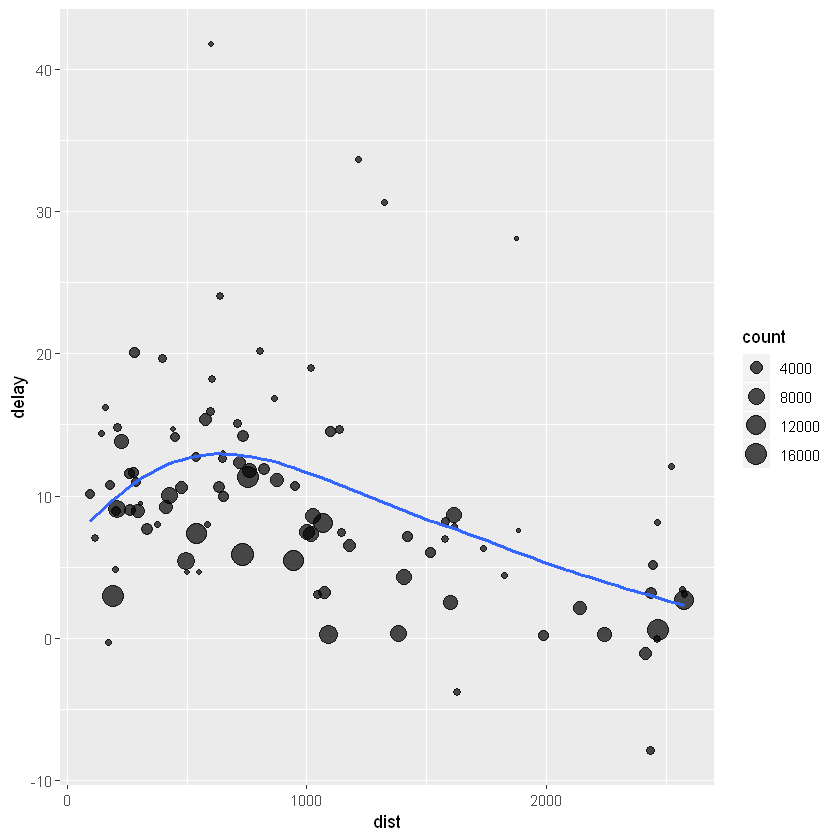

In [43]:
ggplot(delay, aes(dist, delay)) + 
geom_point(mapping = aes(size = count), alpha = 0.7) + 
geom_smooth(se = F)

In [44]:
# Another way to solve the same relationship b/w distance and average delay, using the pipe : %>%
delays <- flights %>%
    group_by(dest) %>%
    summarize(
        count = n(),
        dist = mean(distance, na.rm = T),
        delay = mean(arr_delay, na.rm = T)
    ) %>%
    filter(count > 20, dest != "HNL")

The pipe %>% focusses on transformations. Pronounce %>% as "then". x %>% f(y) turns into f(x, y) and x %>% f(y) %>% g(z) turns into g(f(x, y), z) and so on. Piping is the key criteria for belonging to tidyverse (ggplot2 is the only exception to this criteria).

# Missing Values
Note <- na.rm() argument removes missing values prior to computation. All aggregate functions have na.rm argument.

In [45]:
# Case where missing values represent cancelled flights 

not_cancelled <- flights %>%
    filter(!is.na(dep_delay), !is.na(arr_delay))

head(not_cancelled %>% 
    group_by(year, month, day) %>%
    summarize(mean = mean(dep_delay)),31)

year,month,day,mean
2013,1,1,11.435620
2013,1,2,13.677802
2013,1,3,10.907778
2013,1,4,8.965859
2013,1,5,5.732218
2013,1,6,7.145959
2013,1,7,5.417204
2013,1,8,2.558296
2013,1,9,2.301232
2013,1,10,2.844995


# Counts

Whenever doing aggression, its good idea to include count(n()), or (sum(!is.na(x))) to check that conclusions are not drawn on very small amounts of data.

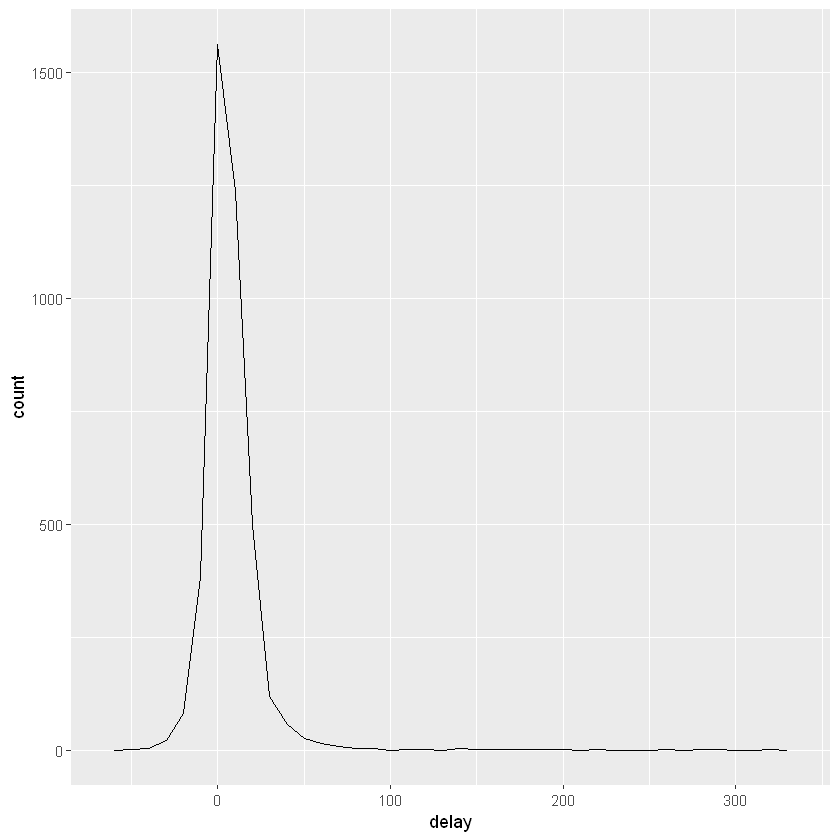

In [46]:
delays <- not_cancelled %>%
    group_by(tailnum) %>%
    summarize(
        delay = mean(arr_delay)
    )

ggplot(delays, aes(delay)) +
    geom_freqpoly(binwidth = 10)

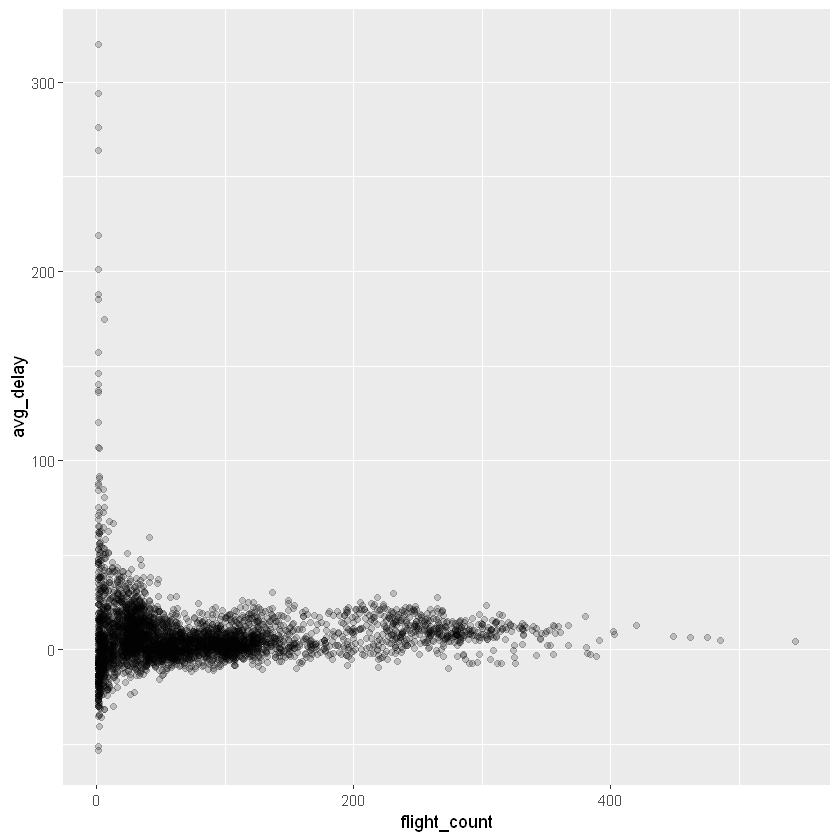

In [47]:
# Relationship b/w flight_count and avg_delay
delays <- not_cancelled %>%
    group_by(tailnum) %>%
    summarize(
        flight_count = n(),
        avg_delay = mean(arr_delay)
    )

ggplot(delays, aes(flight_count, avg_delay)) + 
    geom_point(alpha = 1/5)

There are much greater variations in the average delay when there are few flights. The shape of this plot is very characteristic:  "In a plot of mean (or other group summary) versus group size, the variation decreases as the sample size increases." 

When working with this sort of plot, it's useful to filter out the groups with the smallest number of observations, so as to see more patterns and less extreme variation in the smallest groups.

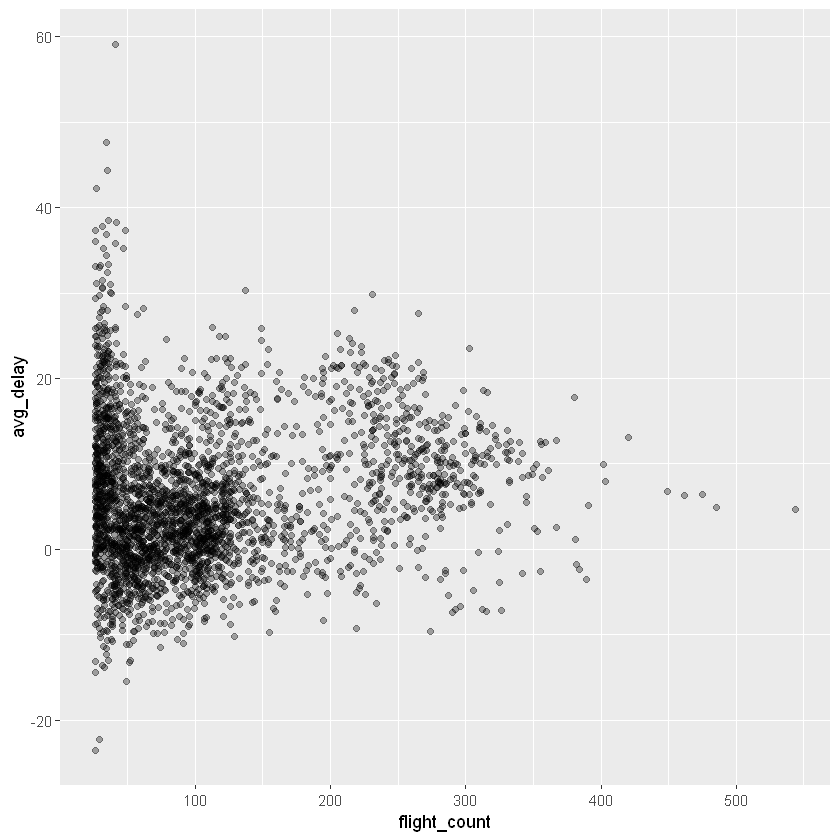

In [48]:
# Handy pattern for integrating dplyr and ggplot2
delays %>%
    filter(flight_count > 25) %>%
    ggplot(aes(flight_count, avg_delay)) +
        geom_point(alpha = 1/3)

In [49]:
#install.packages("Lahman")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


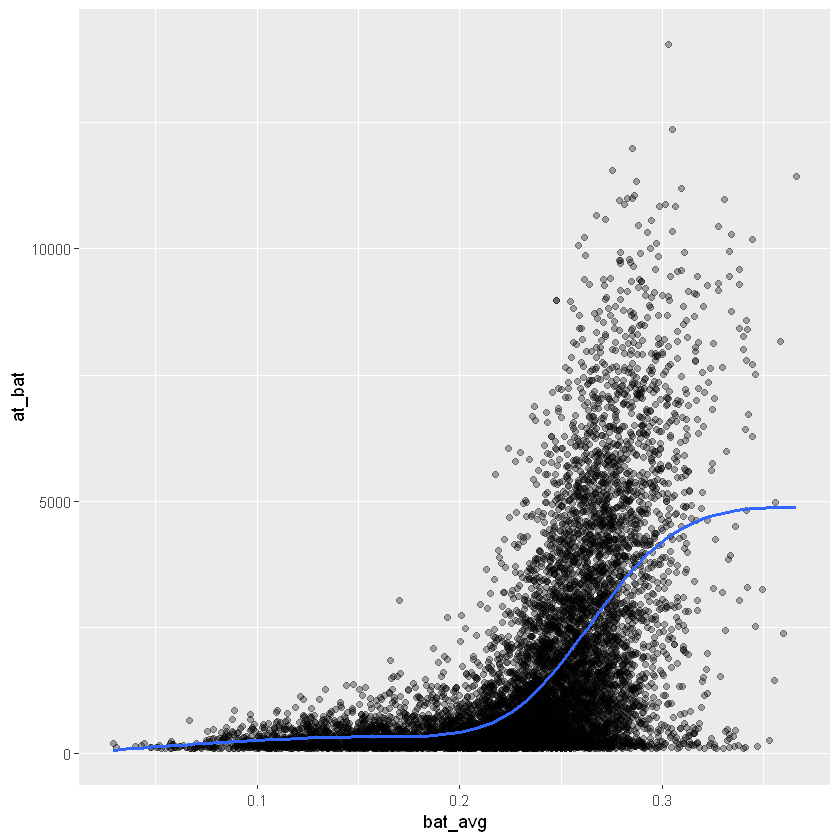

In [50]:
# Compute the batting average (number of hits / number of attempts) of every major league baseball player
batting <- as_tibble(Lahman::Batting)

batters <- batting %>%
    group_by(playerID) %>%
    summarize(
        bat_avg = sum(H, na.rm = T) / sum(AB, na.rm = T),
        at_bat = sum(AB, na.rm = T)
    )

# Plotting skill of batter (as per batting average, ba) v/s number of opportunities (as per at bat, ab)
batters %>%
    filter(at_bat >100) %>%
    ggplot(aes(bat_avg, at_bat)) +
        geom_point(alpha = 1/3) +
        geom_smooth(se = F)

Patterns displayed from the graph:
* The variation in aggregate decreases as we get more data points
* There's a positive correlation between skill (bat_avg) and opportunities to hit the ball (at_bat). This is because teams control who gets to play, and obviously they'll pick their best players.

This also has important implications for ranking. Naively sorting on desc(bat_avg) will not be good, as the players with best batting averages are clearly lucky and not skilled.

# Useful Summary Functions

Measures of location : median() (50% of the data lies below and 50% lies above it).

In [51]:
head(
    not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(
        # average delay
        avg_delay1 = mean(arr_delay),
        # average positive delay
        avg_delay2 = mean(arr_delay[arr_delay > 0])
    )
)

year,month,day,avg_delay1,avg_delay2
2013,1,1,12.651023,32.48156
2013,1,2,12.692888,32.02991
2013,1,3,5.733333,27.66087
2013,1,4,-1.932819,28.30976
2013,1,5,-1.525802,22.55882
2013,1,6,4.236429,24.37270


Measures of spread : standard deviation sd(x), Inter-Quartile Range IQR(x), median absolute deviation mad(x). The first is the standard measure of spread, and last two measures are useful in case of outliers.

In [52]:
#Why is distance of some destinations more variable than others?
head(
    not_cancelled %>%
    group_by(dest) %>%
    summarize(distance_sd = sd(distance)) %>%
    arrange(desc(distance_sd))
)

dest,distance_sd
EGE,10.542765
SAN,10.350094
SFO,10.216017
HNL,10.004197
SEA,9.977993
LAS,9.907786


Measures of rank: min(x), quantile(x, 0.25), max(x). quantile(x, 0.25) gives value of x that is greater than 25% of the values, and less than remaining 75%.

In [53]:
# When do the first and last flight leave each day?
head(
    not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(
        first = min(dep_time),
        last = max(dep_time)
    )
)

year,month,day,first,last
2013,1,1,517,2356
2013,1,2,42,2354
2013,1,3,32,2349
2013,1,4,25,2358
2013,1,5,14,2357
2013,1,6,16,2355


Measures of position: first(x), nth(x, 2), last(x). Similar to x[1], x[2], x[lenght(x)]

In [54]:
# The first and last departure for each day
head(
    not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(
        first_flight = first(dep_time),
        last_flight = last(dep_time)
    )
)

year,month,day,first_flight,last_flight
2013,1,1,517,2356
2013,1,2,42,2354
2013,1,3,32,2349
2013,1,4,25,2358
2013,1,5,14,2357
2013,1,6,16,2355


* These functions are complementary to filtering on ranks. Filtering gives all variables, with each observation in a seperate row.

In [55]:
head(
    not_cancelled %>%
    group_by(year, month, day) %>%
    mutate(r = min_rank(desc(dep_time))) %>%
    filter(r %in% range(r))
)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,r
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,831
2013,1,1,2356,2359,-3,425,437,-12,B6,727,N588JB,JFK,BQN,186,1576,23,59,2013-01-01 23:00:00,1
2013,1,2,42,2359,43,518,442,36,B6,707,N580JB,JFK,SJU,189,1598,23,59,2013-01-02 23:00:00,928
2013,1,2,2354,2359,-5,413,437,-24,B6,727,N789JB,JFK,BQN,180,1576,23,59,2013-01-02 23:00:00,1
2013,1,3,32,2359,33,504,442,22,B6,707,N763JB,JFK,SJU,193,1598,23,59,2013-01-03 23:00:00,900
2013,1,3,2349,2359,-10,434,445,-11,B6,739,N729JB,JFK,PSE,199,1617,23,59,2013-01-03 23:00:00,1


Counts : n() <- returns the size of current group. sum(!is.na(x)) <- returns the number of non-missing values. n_distinct(x) <- returns the number of distinct (unique) values.

In [56]:
#Which destinaitons have the most carriers?
head(
    not_cancelled %>%
    group_by(dest) %>%
    summarize(carriers = n_distinct(carrier)) %>%
    arrange(desc(carriers))
)

dest,carriers
ATL,7
BOS,7
CLT,7
ORD,7
TPA,7
AUS,6


dplyr has a default count() function with optional weight "wt" variable. 

In [57]:
# Total distance a plane flew
head(
    not_cancelled %>%
    count(tailnum, wt = distance)
)

tailnum,n
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616


Counts and proportions of logical values: sum(x > 10), mean(y == 0). When used with numeric functions, TRUE is converted to 1 and FALSE to 0. sum(x) then returns number of TRUEs in x, and mean(x) gives the proportion of TRUE x.

In [58]:
# How many flights left before 5am each day?
head(
    not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(before_5 = sum(dep_time < 500))
)

year,month,day,before_5
2013,1,1,0
2013,1,2,3
2013,1,3,4
2013,1,4,3
2013,1,5,3
2013,1,6,2


In [59]:
# What proportion of flights are delayed by more than an hour
head(
    not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(delay_less_than_60 = mean(arr_delay > 60))
)

year,month,day,delay_less_than_60
2013,1,1,0.07220217
2013,1,2,0.08512931
2013,1,3,0.05666667
2013,1,4,0.03964758
2013,1,5,0.03486750
2013,1,6,0.04704463


# Grouping by Multiple Variables
When grouping by multiple variables, each summary peels off one level of grouping. It makes easy to progressively roll-up a dataset.

In [60]:
daily <- group_by(flights, year, month, day)
head(per_day <- summarize(daily, flights_per_day = n()))

year,month,day,flights_per_day
2013,1,1,842
2013,1,2,943
2013,1,3,914
2013,1,4,915
2013,1,5,720
2013,1,6,832


In [61]:
(per_month <- summarize(per_day, flights_per_month = sum(flights_per_day)))

year,month,flights_per_month
2013,1,27004
2013,2,24951
2013,3,28834
2013,4,28330
2013,5,28796
2013,6,28243
2013,7,29425
2013,8,29327
2013,9,27574
2013,10,28889


In [62]:
(per_year <- summarize(per_month, flights_per_year = sum(flights_per_month)))

year,flights_per_year
2013,336776


Note <- Be careful when rpogressively rolling up summaries...!!! Its ok for sums and counts, but think about weighting means and variances because, "sum of groupwise sums is the overall sum, but the median of the groupwise medians is not the overall median".

# Ungrouping 

ungroup(): To remove grouping, and return to operations on ungrouped data.

In [63]:
daily %>%
    # no longer grouped by date
    ungroup() %>%
    # all flights
    summarize(flights = n())

flights
336776


In [64]:
# Analogous to not_cancelled %>% count(dest)
head(
    not_cancelled %>%
    group_by(dest) %>%
    summarize(
        n = n()
    )
)

dest,n
ABQ,254
ACK,264
ALB,418
ANC,8
ATL,16837
AUS,2411


In [65]:
# Analogous to not_cancelled %>% count(tailnum, wt = distance)
head(
    not_cancelled %>%
    group_by(tailnum) %>%
    summarize(
        n = sum(distance)
    )
)

tailnum,n
D942DN,3418
N0EGMQ,239143
N10156,109664
N102UW,25722
N103US,24619
N104UW,24616


In [66]:
# Flights cancelled per day
head(
    cancelled <- flights %>%
        group_by(year, month, day) %>%
        summarize(
            cancelled_per_day = sum(is.na(dep_delay) | is.na(arr_delay))
        )
    )

year,month,day,cancelled_per_day
2013,1,1,11
2013,1,2,15
2013,1,3,14
2013,1,4,7
2013,1,5,3
2013,1,6,3


In [67]:
head(
    cancelled_vs_delays <- flights %>%
    group_by(year, month, day) %>%
    summarize(
        cancelled_prop = mean(is.na(dep_delay) | is.na(arr_delay)),
        avg_arr_delay = mean(arr_delay, na.rm = T),
        avg_dep_delay = mean(dep_delay, na.rm = T)
    )
)

year,month,day,cancelled_prop,avg_arr_delay,avg_dep_delay
2013,1,1,0.013064133,12.651023,11.548926
2013,1,2,0.015906681,12.692888,13.858824
2013,1,3,0.015317287,5.733333,10.987832
2013,1,4,0.007650273,-1.932819,8.951595
2013,1,5,0.004166667,-1.525802,5.732218
2013,1,6,0.003605769,4.236429,7.148014


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


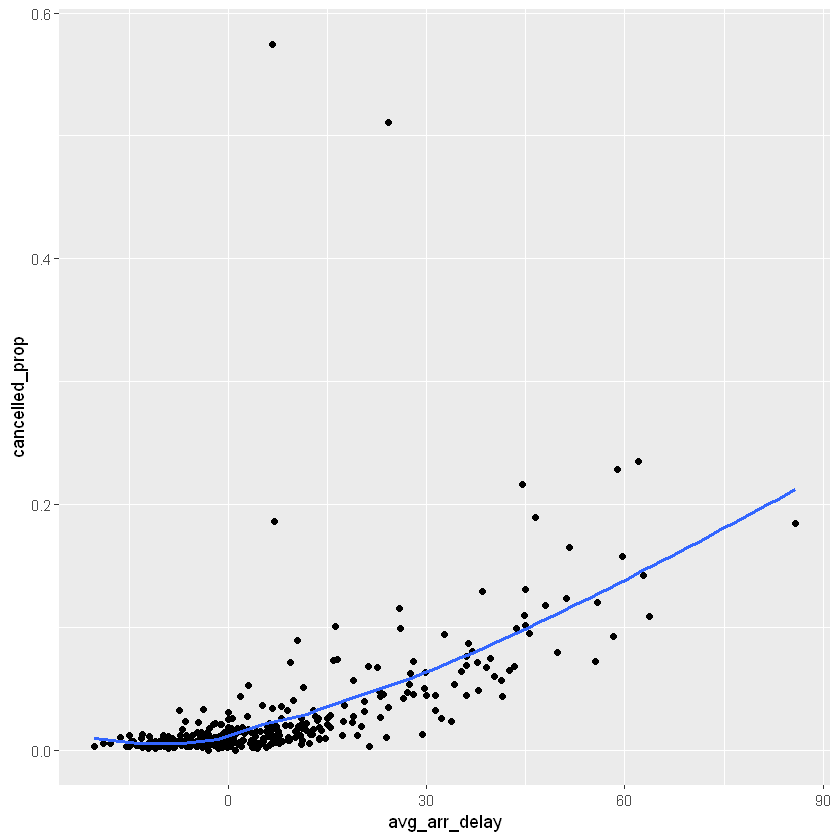

In [68]:
ggplot(cancelled_vs_delays, aes(avg_arr_delay, cancelled_prop)) + 
    geom_point() +
    geom_smooth(se = F)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


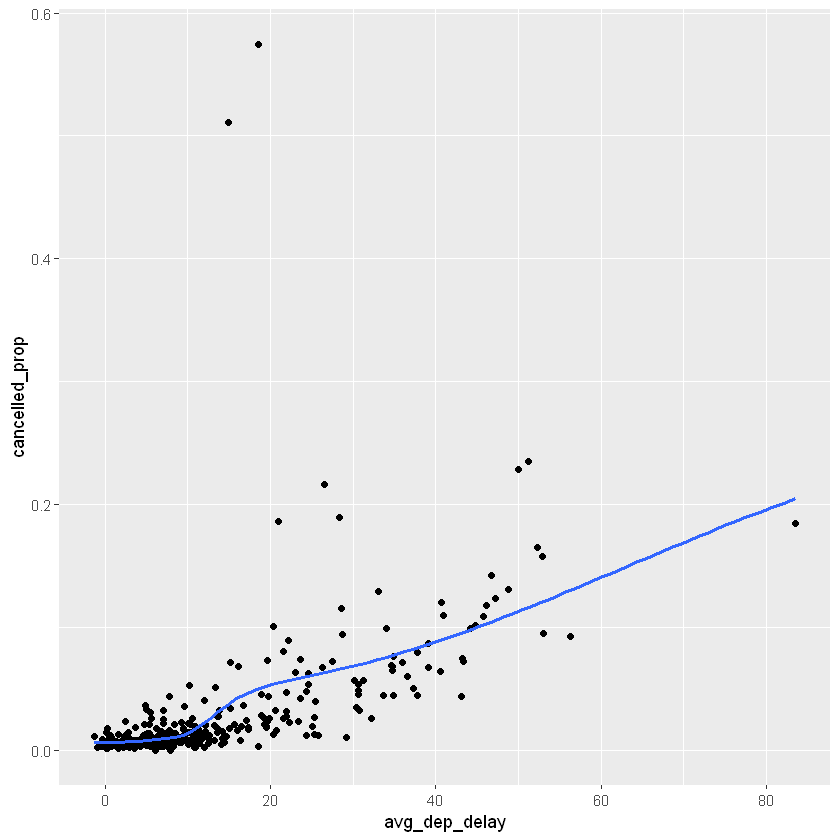

In [69]:
ggplot(cancelled_vs_delays, aes(avg_dep_delay, cancelled_prop)) + 
    geom_point() +
    geom_smooth(se = F)

There is a strong increasing relationship displayed in both of the graphs: avg_arr_delay v/s cancelled_prop and avg_dep_delay v/s cancelled_prop.

In [70]:
# Carriers with the worst arr_delay
head(
    flights %>%
    group_by(carrier) %>%
    summarize(
        delays = mean(arr_delay, na.rm = T)
    ) %>%
    arrange(desc(delays))
)

carrier,delays
F9,21.92070
FL,20.11591
EV,15.79643
YV,15.55699
OO,11.93103
MQ,10.77473


In [71]:
# For each plane, number of flights before the first delay of greater than 1 hour

head(
    flights %>%
    # sort in increasing order
    select(tailnum, year, month,day, dep_delay) %>%
    filter(!is.na(dep_delay)) %>%
    arrange(tailnum, year, month, day) %>%
    group_by(tailnum) %>%
    # cumulative number of flights delayed over one hour
    mutate(cumulative_hr_delays = cumsum(dep_delay > 60)) %>%
    # count the number of flights == 0
    summarise(total_flights = sum(cumulative_hr_delays < 1)) %>%
    arrange(desc(total_flights))
)

tailnum,total_flights
N954UW,206
N952UW,163
N957UW,142
N5FAAA,117
N38727,99
N516JB,99


Note <- The sort argument in count() function if set to TRUE, sorts the output in descending order.

In [72]:
head(count(not_cancelled, dest, sort = T))

dest,n
ATL,16837
ORD,16566
LAX,16026
BOS,15022
MCO,13967
CLT,13674


# Grouped Mutates (and Filters)
Grouping is most useful in conjunction with summarize(), but can also do convenient operations with mutate() and filter().

In [73]:
# Worst members in each group
head(
    flights_sml %>%
    group_by(year, month, day) %>%
    filter(rank(desc(arr_delay)) < 10)
)

year,month,day,dep_delay,arr_delay,distance,air_time
2013,1,1,853,851,184,41
2013,1,1,290,338,1134,213
2013,1,1,260,263,266,46
2013,1,1,157,174,213,60
2013,1,1,216,222,708,121
2013,1,1,255,250,589,115


In [74]:
# Most popular destinations
head(
    popular_dest <- flights %>%
    group_by(dest) %>%
    filter(n() > 365)
)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [75]:
# Compute per group metrics
head(
    popular_dest %>%
    filter(arr_delay > 0) %>%
    mutate(prop_delay = arr_delay / sum(arr_delay)) %>%
    select(year:day, dest, arr_delay, prop_delay)
)

year,month,day,dest,arr_delay,prop_delay
2013,1,1,IAH,11,1.106740e-04
2013,1,1,IAH,20,2.012255e-04
2013,1,1,MIA,33,2.350026e-04
2013,1,1,ORD,12,4.239594e-05
2013,1,1,FLL,19,9.377853e-05
2013,1,1,ORD,8,2.826396e-05


Note <-  A grouped filter is a grouped mutate followed by an ungrouped filter.

Functions that work most naturally in grouped mutates and filters, are known as window functions (versus the summary functions used for summaries). For further help use command: vignette("window-functions")

In [76]:
# Flights (wrt. tailnum ) with worst on-time record

head(
    flights %>%
    group_by(tailnum) %>%
    summarize(
        delay = mean(dep_delay, na.rm = T)
    ) %>%
    arrange(desc(delay))
)

tailnum,delay
N844MH,297
N922EV,274
N587NW,272
N911DA,268
N851NW,233
N654UA,227


In [77]:
# Time (in hours) of day with least possible delays

head(
    flights %>%
    group_by(hour) %>%
    summarize(
        delay = mean(arr_delay, na.rm = T)
    ) %>%
    arrange(delay)
)

hour,delay
7,-5.3044716
5,-4.7969072
6,-3.3844854
9,-1.4514074
8,-1.1132266
10,0.9539401


In [78]:
# Proportion of delay of flights for its destination

head(
    flights %>%
    group_by(dest) %>%
    filter(arr_delay > 0) %>%
    mutate(
        total_arr_delay  =  sum(arr_delay, na.rm = T), # Total average delay for each destination
        arr_delay_prop = arr_delay / total_arr_delay
    ) %>%
    select(month, day, carrier, flight, dest, arr_delay, arr_delay_prop, total_arr_delay) %>%
    arrange(dest, desc(arr_delay_prop))
)

month,day,carrier,flight,dest,arr_delay,arr_delay_prop,total_arr_delay
7,22,B6,1505,ABQ,153,0.03409851,4487
12,14,B6,65,ABQ,149,0.03320704,4487
10,15,B6,65,ABQ,138,0.03075552,4487
7,23,B6,1505,ABQ,137,0.03053265,4487
12,17,B6,65,ABQ,136,0.03030978,4487
7,10,B6,1505,ABQ,126,0.02808112,4487


In [79]:
# Departure delay of the preceding flight from the same airport

head(
    lagged_delays <- flights %>%
    group_by(origin) %>%
    mutate(
        delay_lag = lag(dep_delay)
    ) %>%
    filter(!is.na(dep_delay), !is.na(delay_lag))
)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,delay_lag
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,2
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,4
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,2
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,-4
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,-6
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,-1


In [80]:
# Spotting suspiciously fast flights using the z-score statistics

head(
    standardized_air_timing <- flights %>%
    filter(!is.na(air_time)) %>%
    group_by(origin, dest) %>%
    mutate(
        mean_air_time = mean(air_time),
        sd_air_time = sd(air_time),
        standard_air_time = (air_time - mean_air_time) / sd_air_time     # Z-Score Calculation Formula
    ) %>%
    select(origin, dest, mean_air_time, sd_air_time, standard_air_time)
)

origin,dest,mean_air_time,sd_air_time,standard_air_time
EWR,IAH,195.8404,16.144065,1.9300946
LGA,IAH,200.7932,17.174701,1.5258984
JFK,MIA,152.1300,11.122881,0.7075519
JFK,BQN,194.2411,9.239541,-1.2166348
LGA,ATL,113.5550,9.657191,0.2531767
EWR,ORD,113.2603,9.987122,3.6787080


Flights with values of standardized_air_time (z-score) greater than 2 are unusually fast.

In [81]:
# Flights that are most delayed in air

head(standardized_air_timing %>%
    arrange(desc(standard_air_time))
)

origin,dest,mean_air_time,sd_air_time,standard_air_time
LGA,BOS,37.85082,4.677608,14.78302
EWR,BOS,40.31275,4.922072,14.56444
JFK,SYR,44.53406,3.782374,13.87117
LGA,DCA,45.59467,6.319190,13.51523
JFK,ACK,42.06818,8.127495,12.17249
EWR,BOS,40.31275,4.922072,11.92328


In [82]:
# Destinations flown by atleast two carriers

head(
    flights %>%
    group_by(dest) %>%
    summarize(
        carrier_count = n_distinct(carrier)
    ) %>%
    filter(carrier_count >= 2) %>%
    arrange(desc(carrier_count))
)

dest,carrier_count
ATL,7
BOS,7
CLT,7
ORD,7
TPA,7
AUS,6
